<a href="https://colab.research.google.com/github/Shadghawte/machine-learning./blob/main/prac3b(decisiontree_randomforest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


<ipython-input-19-7fe0e7a59d3e>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64
              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


<ipython-input-19-7fe0e7a59d3e>:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


[122.54189962 130.61520348 127.70319993  96.61699735 118.77090088
 114.46349941 124.77060127 117.7921994  108.09080102  98.27829976
  95.36230012 168.00789799 148.64040131 116.1339003  170.59320122
  85.10679982 123.16519882 109.6826972  112.96160116 131.36820332
 124.2943988  113.58470118 115.82680083 108.75309982 108.7694018
 125.9207992  118.37949947 112.019899   113.49570156 125.63309897
 145.95010109  89.61299997 167.18439988 113.54849965 108.43110089
 120.11170107 141.77889788 160.99110221 174.1516983  153.01720142
 119.43040132 113.45320063 121.33679959 113.78459919 122.09923802
 108.10520047  88.5392991  114.53849904 129.56110275 118.20150113
 103.73050023 129.58640288 107.12939851 160.519204   131.4372004
 117.90289948 147.20720102 133.92740211  95.48690102 124.77820143
 114.64409879  86.18450116 104.42279896 114.00380101  84.08979905
 122.29673814 116.46129912 113.8009021  165.03560376  92.37780023
  80.16580091 160.97340093 158.80990275 107.0237999  147.37180146
 109.5802974

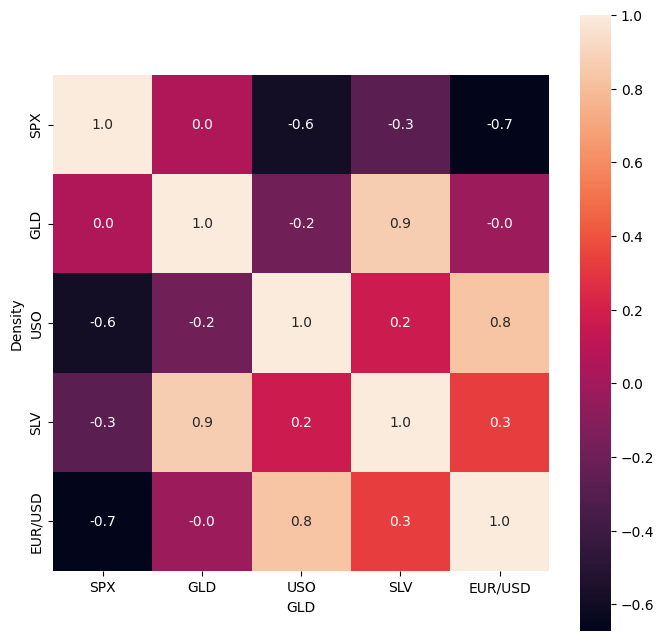

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')
# print first 5 rows in the dataframe
gold_data.head()
# print last 5 rows of the dataframe
gold_data.tail()
# number of rows and columns
gold_data.shape
# getting some basic informations about the data
gold_data.info()
# checking the number of missing values
gold_data.isnull().sum()
# getting the statistical measures of the data
gold_data.describe()
correlation = gold_data.corr()
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={"size": 10})
# correlation values of GLD
print(correlation['GLD'])
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']
print(X)
print(Y)
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
regressor = RandomForestRegressor(n_estimators=100)
# training the model
regressor.fit(X_train,Y_train)
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)